# Đọc và show ảnh

(168, 300, 3)


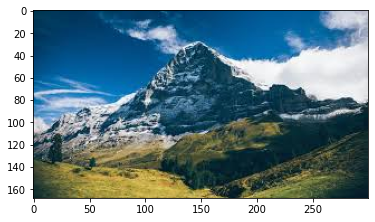

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

img = cv2.imread('mountain.jpg', 1)

print(img.shape)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Thao tác với các pixel

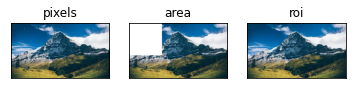

In [2]:
img = cv2.imread('mountain.jpg', 1)
img2 = cv2.imread('mountain.jpg', 1)
img3 = cv2.imread('mountain.jpg', 1)
img[20, 40] = 255 # img[y,x]
img2[0:100,0:100] = 255


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.subplot(131),plt.imshow(img),plt.title('pixels')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img2),plt.title('area')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img3),plt.title('roi')
plt.xticks([]), plt.yticks([])
plt.show()

# Tách và Gộp các kênh màu

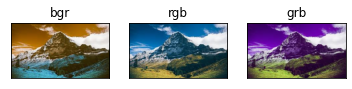

In [3]:
img = cv2.imread('mountain.jpg', 1)
b, g, r = cv2.split(img)
img2 = cv2.merge((r, g, b))
img3 = cv2.merge((g, r, b))

plt.subplot(131),plt.imshow(img),plt.title('bgr')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img2),plt.title('rgb')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img3),plt.title('grb')
plt.xticks([]), plt.yticks([])
plt.show()

# Show Histogram ảnh
### cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])


(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x7f4f45015790>])

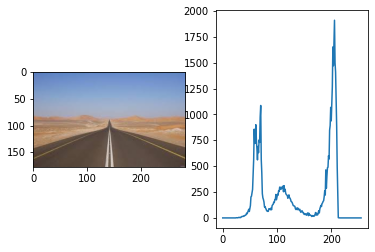

In [4]:
img = cv2.imread('road.jpg',1)
hist = cv2.calcHist([img],[0],None,[256],[0,256]) # only blue channel

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.plot(hist)

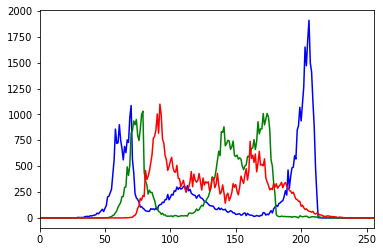

In [5]:
img = cv2.imread('road.jpg',1)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Làm mờ (blur)

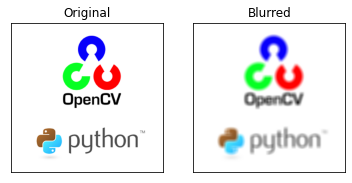

In [6]:
k=9
img = cv2.imread('1.png')
blur = cv2.blur(img,(k,k))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 2D Convolution ( Image Filtering )

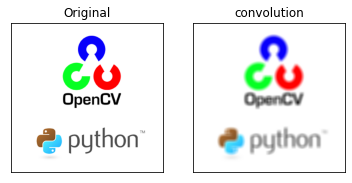

In [7]:
k=9
img = cv2.imread('1.png')
kernel = np.ones((k,k),np.float32)/k**2
img2 = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2),plt.title('convolution')
plt.xticks([]), plt.yticks([])
plt.show()   

# Gaussian Blurring

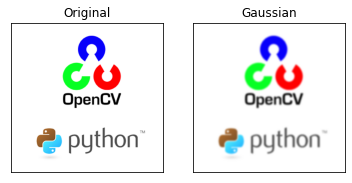

In [8]:

k=9
img = cv2.imread('1.png')
blur = cv2.GaussianBlur(img,(k,k),0)


plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()   

# Bitwise_and, bitwise_or, bitwise_xor

[[1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
[[0 0 0 1 1 1 1 1]
 [0 0 0 1 1 1 1 1]
 [0 0 0 1 1 1 1 1]
 [0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


Text(0.5, 1.0, 'xor')

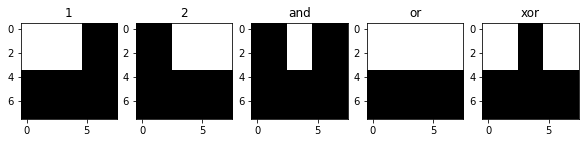

In [9]:
array = '1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0'
array = array.split(' ')
array = [int(x) for x in array]
array = np.reshape(array, (8,8))

array2 = '0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0'
array2 = array2.split(' ')
array2 = [int(x) for x in array2]
array2 = np.reshape(array2, (8,8))

_and = cv2.bitwise_and(array, array2)
_or = cv2.bitwise_or(array, array2)
_xor = cv2.bitwise_xor(array, array2)

#============plot===========
fig, axs = plt.subplots(1,5,figsize=(10,4))

axs[0].imshow(array,cmap="gray")
axs[0].set_title('1')
print(array)

axs[1].imshow(array2,cmap="gray")
axs[1].set_title('2')
print(array2)

axs[2].imshow(_and,cmap="gray")
axs[2].set_title('and')
#print(_and)

axs[3].imshow(_or,cmap="gray")
axs[3].set_title('or')
#print(_or)

axs[4].imshow(_xor,cmap="gray")
axs[4].set_title('xor')
#print(_xor)

# Threshold functions

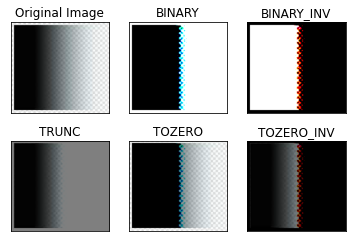

In [10]:
# array = '255 220 185 150 115 80 45 10 255 220 185 150 115 80 45 10 255 220 185 150 115 80 45 10 255 220 185 150 115 80 45 10 255 220 185 150 115 80 45 10 255 220 185 150 115 80 45 10 255 220 185 150 115 80 45 10 255 220 185 150 115 80 45 10'
# array = array.split(' ')
# array = [int(x) for x in array]
# print(array)
# img = np.reshape(array, (8,8))
#
img= cv2.imread('gradient.jpg')
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



# Adaptive Threshold


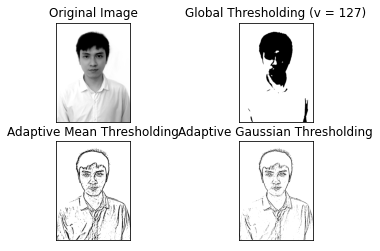

In [11]:
img = cv2.imread('huy.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
# Block Size: 11 - It decides the size of neighbourhood area.
# C: 2 - It is just a constant which is subtracted from the mean or weighted mean calculated.

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Otsu’s Binarization
### It automatically calculates a threshold value from image histogram for a bimodal image.

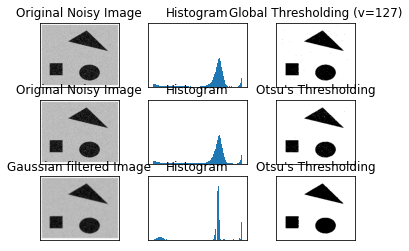

In [12]:
img = cv2.imread('noisy.jpg',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Canny edge detection

Text(0.5, 1.0, 'canny')

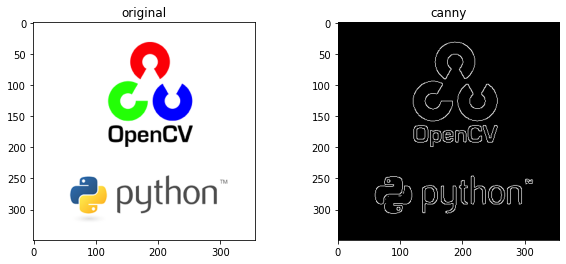

In [13]:
img = cv2.imread('1.png', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
canny = cv2.Canny(blur, 50 , 50)

#============plot===========
canny = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1,2,figsize=(10,4))

axs[0].imshow(img)
axs[0].set_title('original')
axs[1].imshow(canny,cmap="gray")
axs[1].set_title('canny')

# Image Gradients, edges


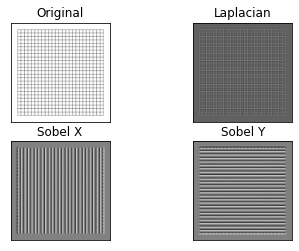

In [14]:
img = cv2.imread('grid.png',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

#  contours,  cv.findContours(), cv.drawContours()

112


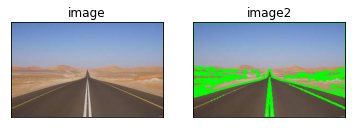

In [15]:
img = cv2.imread('road.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1),plt.imshow(img)
plt.title('image'), plt.xticks([]), plt.yticks([])

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img2 = cv2.drawContours(img, contours, -1, (0,255,0), 2)

print(len(contours))

plt.subplot(1,2,2),plt.imshow(img2,cmap='gray')
plt.title('image2'), plt.xticks([]), plt.yticks([])
plt.show()

## Bounding Rectangle


33


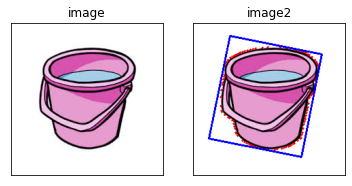

In [17]:
img = cv2.imread('obj.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1),plt.imshow(img)
plt.title('image'), plt.xticks([]), plt.yticks([])

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 230, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[3]
cv2.drawContours(img, cnt, -1, (255,0,0), 2)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img2 = cv2.drawContours(img,[box],0,(0,0,255),2)

print(len(contours))


plt.subplot(1,2,2),plt.imshow(img2)
plt.title('image2'), plt.xticks([]), plt.yticks([])
plt.show()

# Draw lines, rectangles, text on a image

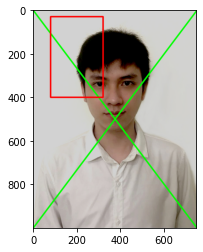

In [19]:
img = cv2.imread('huy.jpg', 1)
cv2.line(img, (0,0), (img.shape[1],img.shape[0]), (0,255,0),5)
cv2.line(img, (img.shape[1],0), (0,img.shape[0]), (0,255,0),5)
cv2.rectangle(img, (80,30), (320,400), (0,0,255),5)
font = cv2.FONT_HERSHEY_SIMPLEX


#============plot===========
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# perform mask operations

Text(0.5, 1.0, 'bg')

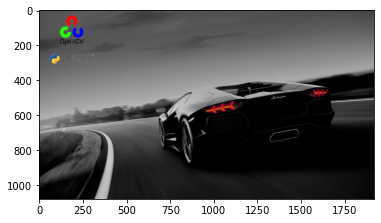

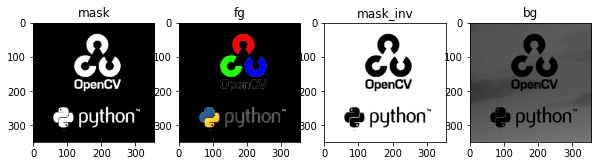

In [21]:
img1 = cv2.imread('1.png', 1)
img2 = cv2.imread('lamborghini-gallardo-hd-wallpapers.jpg', 1)
roi = img2[0:img1.shape[0], 0:img1.shape[1]]
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)
img1_fg = cv2.bitwise_and(img1, img1, mask = mask)
img2_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
add = cv2.add(img1_fg, img2_bg)
img2[0:img1.shape[0], 0:img1.shape[1]] = add

#============plot===========
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

fig, axs = plt.subplots(1,4,figsize=(10,4))

axs[0].imshow(mask,cmap="gray")
axs[0].set_title('mask')

img1_fg = cv2.cvtColor(img1_fg, cv2.COLOR_BGR2RGB)
axs[1].imshow(img1_fg)
axs[1].set_title('fg')

axs[2].imshow(mask_inv,cmap="gray")
axs[2].set_title('mask_inv')

img2_bg = cv2.cvtColor(img2_bg, cv2.COLOR_BGR2RGB)
axs[3].imshow(img2_bg)
axs[3].set_title('bg')


# Image face detection using CascadeClassifier

[[195 201 347 347]]


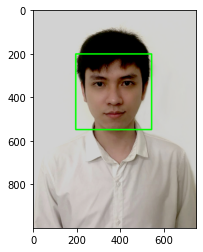

In [23]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
img = cv2.imread('huy.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.05, minNeighbors = 5)

print(faces)

for x,y,w,h in faces:
    img = cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,0),5)


#============plot===========
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Load video seed from computer camera

In [25]:
# video = cv2.VideoCapture(0)
# while(True):
#     boolean, frame = video.read()
#     cv2.imshow("video", frame)
#     key = cv2.waitKey(1)
#     if key == ord('q'):
#         frame_final = frame
#         break
# video.release()
# cv2.destroyAllWindows()

# #============plot===========
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# plt.imshow(frame)

# Video face detection using CascadeClassifier

In [ ]:
+

# Video object Tracking

In [ ]:
cap = cv2.VideoCapture(0)
original =None
result = None
mask1 = None
while(True):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
#     cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(1)
    if k == 27:
        original = frame
        result = res
        mask1 = mask
        break
video.release()
cv2.destroyAllWindows()

original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1,3,figsize=(10,4))
axs[0].imshow(original)
axs[1].imshow(mask1)
axs[2].imshow(result)
plt.subplot(131),plt.imshow(original),plt.title('original')
plt.subplot(132),plt.imshow(mask1),plt.title('mask')
plt.subplot(133),plt.imshow(result),plt.title('result')
plt.show()

In [ ]:
blue = np.uint8([[[255, 0,0 ]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)

# Template matching

In [ ]:
img = cv2.imread('1.png',0)
img2 = img.copy()
template = cv2.imread('template.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 0, 2)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [ ]:
# find multiple matches

img = cv2.imread('duplicate.jpg',0)
template = cv2.imread('template.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.4
loc = np.where(res >= threshold)

for point in zip(*loc[::-1]):
    cv2.rectangle(img, point, (point[0]+w, point[1]+h), (0,0,0), 1)

cv2.imshow("detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(img, cmap="gray")